In [1]:
# import jupyterthemes as jt
# jt.get_themes()
# jt.install_theme(theme = 'onedork')

<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Projeto Proposto 
</h1>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Este projeto baseia-se na criação de um Modelo de Classificação para Previsão de Satisfação de Clientes. </i>       
</p>  

# <font color='red' style='font-size: 40px;'> Problemática </font>
<hr style='border: 2px solid red;'>

Este projeto tem o intuito de ser um Modelo de Machine Learning para prever a insatisfação dos Clientes. A coluna ‘TARGET’ é a variável resposta. Ela é igual a 1 para clientes insatisfeitos e igual a 0 para clientes satisfeitos. Duas bases são dadas, uma para treino e uma para avaliação. Três são as tarefas a serem realizadas.


# <font color='red' style='font-size: 40px;'> Bibliotecas Utilizadas </font>
<hr style='border: 2px solid red;'>

In [2]:
## Bibliotecas De Manipulação de Dados e Visualização
import pandas as pd 
import builtins as builtins
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import display, Image

## Bibliotecas de Modelagem Matemática e Estatística
import numpy as np
import scipy as sp 
import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import normaltest, ttest_ind, ttest_rel, mannwhitneyu, wilcoxon, kruskal, uniform
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.diagnostic import lilliefors

# Bibliotecas de Seleção de Modelos
from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, cross_val_predict
from sklearn.feature_selection import VarianceThreshold, chi2, mutual_info_classif
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, SmartCorrelatedSelection

# Bibliotecas de Pré-Processamento e Pipeline
from category_encoders import BinaryEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Bibliotecas de Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Bibliotecas de Métricas de Machine Learning
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, silhouette_score

# Parâmetros de Otimização
import warnings
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings

# <font color='red' style='font-size: 40px;'> Funções </font>
<hr style='border: 2px solid red;'>

## Funções de Visualização

* Plota Barras 

In [3]:
def plota_barras(lista_variaveis, hue, df, linhas, colunas, titulo):
    if hue != False:
        if (linhas == 1) and (colunas == 1):
            k = 0
            ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', hue = hue)
            ax.set_title(f'{titulo}')
            ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
            ax.set_ylabel(f'Quantidade', fontsize = 14)
            total = []
            for bar in ax.patches:
                height = bar.get_height()
                total.append(height)
            total = builtins.sum(total)
            
            sizes = []
            for bar in ax.patches:
                height = bar.get_height()
                sizes.append(height)
                ax.text(bar.get_x() + bar.get_width()/1.6,
                        height,
                        f'{builtins.round((height/total)*100, 2)}%',
                        ha = 'center',
                        fontsize = 12
                )
            ax.set_ylim(0, builtins.max(sizes)*1.1)
            plt.show()
        elif linhas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(14, 7), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[j], hue = hue)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    k = k + 1
        elif colunas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(14, 7), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i], hue = hue)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    k = k + 1
        else: 
            fig, axis = plt.subplots(linhas, colunas, figsize=(14, 7), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i, j], hue = hue)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    k = k + 1
    else:
        if (linhas == 1) and (colunas == 1):
            k = 0
            ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', color='#1FB3E5')
            ax.set_title(f'{titulo}')
            ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
            ax.set_ylabel(f'Quantidade', fontsize = 14)
            total = []
            for bar in ax.patches:
                height = bar.get_height()
                total.append(height)
            total = builtins.sum(total)
            
            sizes = []
            for bar in ax.patches:
                height = bar.get_height()
                sizes.append(height)
                ax.text(bar.get_x() + bar.get_width()/1.6,
                        height,
                        f'{builtins.round((height/total)*100, 2)}%',
                        ha = 'center',
                        fontsize = 12
                )
            ax.set_ylim(0, builtins.max(sizes)*1.1)
            plt.show()

        elif linhas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(14, 7), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[j], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    k = k + 1
        elif colunas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(14, 7), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    k = k + 1
        else:
            fig, axis = plt.subplots(linhas, colunas, figsize=(14, 7), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i, j], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    k = k + 1


* Plota Histogramas 

In [4]:
def plota_histograma(lista_variaveis, df, linhas, colunas, titulo):
    if (linhas == 1) and (colunas == 1): 
        k = 0
        mediana = df[lista_variaveis[k]].median()
        media = df[lista_variaveis[k]].mean()
        plt.figure(figsize = (14, 5))
        ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', bins = 30)
        ax.set_title(f'{titulo}')
        ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
        ax.set_ylabel(f'Frequência', fontsize = 14)
        ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
        ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
        plt.ticklabel_format(style='plain')
        plt.legend(loc = 'best')
        plt.show()
    elif linhas == 1:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 5), sharey = True)
        fig.suptitle(f'{titulo}')
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                mediana = df[lista_variaveis[k]].median()
                media = df[lista_variaveis[k]].mean().round()
                ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[j], bins = 30)
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
                ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
                ax.ticklabel_format(style='plain')
                ax.legend(loc = 'best')
                k = k + 1
    elif colunas == 1:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 5), sharey = True)
        fig.suptitle(f'{titulo}')
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                mediana = df[lista_variaveis[k]].median()
                media = df[lista_variaveis[k]].mean().round()
                ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i], bins = 30)
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
                ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
                ax.ticklabel_format(style='plain')
                ax.legend(loc = 'best')
                k = k + 1
    else:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 5), sharey = True)
        fig.suptitle(f'{titulo}')
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                mediana = df[lista_variaveis[k]].median()
                media = df[lista_variaveis[k]].mean().round()
                ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i, j], bins = 30)
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
                ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
                ax.ticklabel_format(style='plain')
                ax.legend(loc = 'best')
                k = k + 1

* Plota Boxplot

In [5]:
def plota_boxplot(lista_variaveis, df, linhas, colunas, titulo):
    if (linhas == 1) and (colunas == 1): 
        k = 0
        plt.figure(figsize = (14, 12))
        ax = sns.boxplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', orient = 'h')
        ax.set_title(f'{titulo}')
        ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
        ax.set_ylabel(f'Frequência', fontsize = 14)
        plt.show()
    elif linhas == 1:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 12), sharey = True)
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                ax = sns.boxplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[j], orient = 'h')
                ax.set_title(f'{titulo}')
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                k = k + 1
    elif colunas == 1:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 12), sharey = True)
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                ax = sns.boxplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i], orient = 'h')
                ax.set_title(f'{titulo}')
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                k = k + 1
    else:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 12), sharey = True)
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                ax = sns.boxplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i, j], orient = 'h')
                ax.set_title(f'{titulo}')
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                k = k + 1

## Funções de Estatística

* Analisa Correlação

In [6]:
def analisa_correlacao(metodo, df):
    plt.figure(figsize=(24, 12))
    heatmap = sns.heatmap(df.corr(method=metodo), vmin=-1, vmax=1, cmap='magma')
    heatmap.set_title(f"Analisando Correlação de {metodo}")
    plt.grid(False)
    plt.box(False)
    plt.tight_layout()
    plt.grid(False)
    plt.show()


* Analisa Normalidade 

In [7]:
def analisa_normalidade(amostra1, amostra2, variavel):

    normaltest_amostra = normaltest(amostra[variavel])
    if normaltest_amostra[1] < 0.05:
        print(f'Pelo Teste de Hipótese, A Hipótese Nula de que a variável "{variavel}" segue uma Distribuição Normal é REJEITADA!')
    else:
        print(f'Pelo Teste de Hipótese, A Hipótese Nula de  que a variável "{variavel}" segue uma Distribuição Normal é ACEITA')

    plt.figure(figsize = (14, 7))
    stats.probplot(amostra1[variavel], dist = 'norm', plot = plt)
    plt.title(f'Amostra 1', fontsize = 14)
    plt.grid(False)
    plt.box(False)
    plt.tight_layout()
    plt.show()

- Analise Outliers

In [8]:
def analisa_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IIQ = Q3 - Q1

    outlier_inferior = Q1 - 1.5*IIQ 
    outlier_superior = Q3 + 1.5*IIQ

    return outlier_inferior, outlier_superior

- Remove Features de baixa Variância

In [9]:
def remove_features_baixa_variancia(target, df, threshold):
    target_column = df[target]
    features = df.drop(target, axis=1)

    selector = VarianceThreshold(threshold=threshold)
    features_filtered = selector.fit_transform(features)

    feature_indices = selector.get_support(indices=True)
    selected_features = features.columns[feature_indices]
    selected_features = selected_features.append(pd.Index([target]))

    return selected_features.tolist()

- Remove Features com Base no teste estatístico de interesse 

In [10]:
def remove_features_mutual_information(target, df, threshold):
    x_train, y_train = separa_feature_target(target, df)

    # Calcular a informação mútua entre cada variável e a variável de saída
    mutual_info = mutual_info_classif(x_train, y_train, random_state = 42)

    # Criar um DataFrame com o nome da feature e sua mutual information
    features_selected = pd.DataFrame({'Feature': x_train.columns, 'Mutual Information': mutual_info})
    features_selected = features_selected.loc[features_selected['Mutual Information'] > threshold]
    features_selected = features_selected.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

    selected_features = list(features_selected['Feature'])
    selected_features.append(target)
    
    return features_selected, selected_features

- Remove Features com Multicolinearidade 

In [11]:
def remove_multicolinearidade(target, df, threshold_corr):
    qualitativas_numericas = [column for column in df.columns if df[column].nunique() <= 5]
    discretas = [column for column in df.columns if 5 < df[column].nunique() <= 50]
    continuas = [column for column in df.columns if df[column].nunique() > 50]

    # Separa entre Features e Target
    x, y = separa_feature_target(target, df)
    x = x[continuas]

    # Calcula a matriz de correlação
    correlation_matrix = x.corr()

    # Obtém as variáveis com alta correlação (maior que o threshold)
    high_corr_vars = set()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > threshold_corr:
                high_corr_vars.add(correlation_matrix.columns[i])
                high_corr_vars.add(correlation_matrix.columns[j])

    # Calcula a mutual information em relação à variável de destino para as variáveis com alta correlação
    mutual_info = {}
    for var in high_corr_vars:
        mi = mutual_info_classif(df[[var]], y, random_state = 42)[0]
        mutual_info[var] = mi

    # Seleciona, para cada par de variáveis com alta correlação, aquela com maior mutual information em relação à variável de destino
    selected_features = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            if var1 in high_corr_vars and var2 in high_corr_vars:
                if mutual_info[var1] >= mutual_info[var2]:
                    selected_features.append(var1)
                else:
                    selected_features.append(var2)

    # Adiciona as variáveis qualitativas_numericas e discretas 
    selected_features.extend(qualitativas_numericas)
    selected_features.extend(discretas)

    # Retira as Duplicatas
    selected_features = list(set(selected_features))

    # Remove e Adiciona a Target
    selected_features.remove(target)
    selected_features.append(target)

    # Retorna o nome das colunas selecionadas
    return selected_features

- Remove Features com Baixa Feature Importance 

In [12]:
def remove_features_feature_importance(target, df, class_weight, threshold):

    # Separa entre Features e Target
    x, y = separa_feature_target(target, df)

    # Criar o modelo de Random Forest
    model = RandomForestClassifier(random_state=42, criterion='log_loss', n_estimators=20, class_weight={0:1, 1:class_weight})

    # Treinar o modelo
    model.fit(x, y)

    # Obter as importâncias das features
    feature_importances = model.feature_importances_

    # Selecionar as features com importância maior que zero
    selected_features = list(x.columns[feature_importances > threshold])
    selected_features.append(target)

    return selected_features

## Funções de Métricas ou Avaliação

- KS

In [13]:
def ks(y_proba_0, y_proba_1):
    KS, p_value = stats.ks_2samp(y_proba_0, y_proba_1)

    if p_value > 0.05:
        ks_message = 'Pelo Teste de KS, não há diferença significativa entre as amostras'
    else:
        ks_message = 'Pelo Teste de KS, há diferença significativa entre as amostras'

    return KS, ks_message

def calculate_ks(y_proba_0, y_proba_1):
    # Calcular as probabilidades acumuladas
    proba_cum_0 = np.cumsum(y_proba_0) / np.sum(y_proba_0)
    proba_cum_1 = np.cumsum(y_proba_1) / np.sum(y_proba_1)

    # Calcular a diferença máxima entre as probabilidades acumuladas
    KS = np.max(np.abs(proba_cum_0 - proba_cum_1))

    return KS

* Métricas Gerais

In [14]:
def metricas_classificacao(classificador, y_train, y_predict_train, y_test, y_predict_test):
    accuracy = accuracy_score(y_train, y_predict_train)
    precision = precision_score(y_train, y_predict_train)
    recall = recall_score(y_train, y_predict_train)
    roc_curve = roc_auc_score(y_train, y_predict_train)
    metricas_treino = pd.DataFrame({'Acuracia':accuracy, 'Precisao':precision, 'Recall':recall, 'AUC':roc_curve, 'Etapa':'treino','Classificador':classificador}, index = np.arange(1))
    
    accuracy = accuracy_score(y_test, y_predict_test)
    precision = precision_score(y_test, y_predict_test)
    recall = recall_score(y_test, y_predict_test)
    roc_curve = roc_auc_score(y_test, y_predict_test)
    metricas_teste = pd.DataFrame({'Acuracia':accuracy, 'Precisao':precision, 'Recall':recall, 'AUC':roc_curve, 'Etapa':'teste','Classificador':classificador}, index = np.arange(1, 2))
    
    metricas_finais = pd.concat([metricas_treino, metricas_teste])

    return metricas_finais

* Validação Cruzada 

In [15]:
def validacao_cruzada_classificacao(classificador, x_train, y_train, class_weight, n_splits):

    qualitativas_numericas = [column for column in x_train.columns if x_train[column].nunique() <= 5]
    discretas = [column for column in x_train.columns if (x_train[column].nunique() > 5) and (x_train[column].nunique() <= 50)]
    continuas = [column for column in x_train.columns if x_train[column].nunique() > 50]

    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    models = {
        'Regressão Logística': make_pipeline(
            ColumnTransformer([
                ('qualitativas_numericas', make_pipeline(SimpleImputer(strategy='constant')), qualitativas_numericas),
                ('discretas', make_pipeline(SimpleImputer(strategy='median')), discretas),
                ('continuas', make_pipeline(SimpleImputer(strategy='median')), continuas)
                ]),
            LogisticRegression(random_state=42, class_weight={0:1, 1:class_weight}, solver = 'liblinear')
        ),
        'Random Forest': make_pipeline(
            ColumnTransformer([
                ('qualitativas_numericas', make_pipeline(SimpleImputer(strategy='constant')), qualitativas_numericas),
                ('discretas', make_pipeline(SimpleImputer(strategy='median')), discretas),
                ('continuas', make_pipeline(SimpleImputer(strategy='median')), continuas)
                ]),
            RandomForestClassifier(random_state=42, criterion='log_loss', n_estimators=20, max_depth=4, class_weight={0:1, 1:class_weight})
        ),
        'XGBoost': make_pipeline(
            ColumnTransformer([
                ('qualitativas_numericas', make_pipeline(SimpleImputer(strategy='constant')), qualitativas_numericas),
                ('discretas', make_pipeline(SimpleImputer(strategy='median')), discretas),
                ('continuas', make_pipeline(SimpleImputer(strategy='median')), continuas)
                ]),
            XGBClassifier(random_state=42, n_estimators=20, max_depth=5, learning_rate=0.01, eval_metric='logloss', objective='binary:logistic', scale_pos_weight = class_weight)
        )
    }

    if classificador in models:
        model = models[classificador]
    else:
        print('Utilize Regressão Logística, Random Forest ou XGBoost como opções de Classificadores!')
    
    scoring = ['accuracy', 'precision', 'recall', 'roc_auc']
    scores = cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring, return_train_score=False)
    
    metricas_finais = pd.DataFrame({
        'Acuracia': scores['test_accuracy'].mean(),
        'Precisao': scores['test_precision'].mean(),
        'Recall': scores['test_recall'].mean(),
        'AUC':scores['test_roc_auc'].mean(),
        'Etapa': 'validacao_cruzada',
        'Classificador': classificador
    }, index=[1])
    
    return metricas_finais


- Junção de Matrizes 

In [16]:
def metricas_classificacao_modelos_juntos(lista_modelos):
    metricas_modelos = pd.concat(lista_modelos).set_index('Classificador')
    return metricas_modelos

- Retorno Financeiro

In [17]:
def retorno_financeiro(target, y_true, y_predict):
    df = pd.DataFrame({'y_true':y_true[target].values, 'y_predict':y_predict})

    TN = df.loc[(df['y_true'] == 0) & (df['y_predict'] == 0)].shape[0]
    FN = df.loc[(df['y_true'] == 1) & (df['y_predict'] == 0)].shape[0]
    FP = df.loc[(df['y_true'] == 0) & (df['y_predict'] == 1)].shape[0]
    TP = df.loc[(df['y_true'] == 1) & (df['y_predict'] == 1)].shape[0]

    matriz_confusao = np.array(
        [(TN, FP),
        (FN, TP)]
    )
    matriz_custo_beneficios = np.array(
        [(0, 10),
        (0, 90)]
    )
    retorno_financeiro = int(
        (matriz_confusao[0, 0]*matriz_custo_beneficios[0, 0]) - (matriz_confusao[0, 1]*matriz_custo_beneficios[0, 1]) - (matriz_confusao[1, 0]*matriz_custo_beneficios[1, 0]) + (matriz_confusao[1, 1]*matriz_custo_beneficios[1, 1])
        )
    return retorno_financeiro

## Funções de Machine Learning

* Separa entre Features e Target 

In [18]:
def separa_feature_target(target, dados):
    x = dados.drop(target, axis = 1)
    y = dados[[target]]

    return x, y

* Separa entre Treino e Teste

In [19]:
def separa_treino_teste(target, dados, size):
    x = dados.drop(target, axis = 1)
    y = dados[target]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= size, random_state = 42)

    df_train = pd.concat([x_train, y_train], axis = 1)
    df_test = pd.concat([x_test, y_test], axis = 1)

    return df_train, df_test

- Algoritmos de Classificação

In [20]:
def Classificador(classificador, x_train, y_train, x_test, y_test, class_weight):

    # Define as colunas categóricas e numéricas
    qualitativas_numericas = [column for column in x_train.columns if x_train[column].nunique() <= 5]
    discretas = [column for column in x_train.columns if (x_train[column].nunique() > 5) and (x_train[column].nunique() <= 50)]
    continuas = [column for column in x_train.columns if x_train[column].nunique() > 50]

    models = {
        'Regressão Logística': make_pipeline(
            ColumnTransformer([
                ('qualitativas_numericas', make_pipeline(SimpleImputer(strategy='constant')), qualitativas_numericas),
                ('discretas', make_pipeline(SimpleImputer(strategy='median')), discretas),
                ('continuas', make_pipeline(SimpleImputer(strategy='median')), continuas)
            ]),
            LogisticRegression(random_state=42, class_weight={0:1, 1:class_weight}, solver = 'liblinear')
        ),
        'Random Forest': make_pipeline(
            ColumnTransformer([
                ('qualitativas_numericas', make_pipeline(SimpleImputer(strategy='constant')), qualitativas_numericas),
                ('discretas', make_pipeline(SimpleImputer(strategy='median')), discretas),
                ('continuas', make_pipeline(SimpleImputer(strategy='median')), continuas)
            ]),
            RandomForestClassifier(random_state=42, criterion='log_loss', n_estimators=20, max_depth=4, class_weight={0:1, 1:class_weight})
        ),
        'XGBoost': make_pipeline(
            ColumnTransformer([
                ('qualitativas_numericas', make_pipeline(SimpleImputer(strategy='constant')), qualitativas_numericas),
                ('discretas', make_pipeline(SimpleImputer(strategy='median')), discretas),
                ('continuas', make_pipeline(SimpleImputer(strategy='median')), continuas)
            ]),
            XGBClassifier(random_state=42, n_estimators=20, max_depth=5, learning_rate=0.01, eval_metric='logloss', objective='binary:logistic', scale_pos_weight = class_weight)
        )
    }

    if classificador in models:
        model = models[classificador]
    else:
        print('Utilize Regressão Logística, Random Forest ou XGBoost como opções de Classificadores!')

    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    y_proba_train = model.predict_proba(x_train)
    y_proba_test = model.predict_proba(x_test)

    return model, y_pred_train, y_pred_test, y_proba_train, y_proba_test


- Algoritmos de Classificação Otimizados

In [21]:
def modelo_otimizado(classificador, x_train, y_train, x_test, y_test):
    # Define as colunas categóricas e numéricas
    qualitativas_numericas = [column for column in x_train.columns if x_train[column].nunique() <= 5]
    discretas = [column for column in x_train.columns if (x_train[column].nunique() > 5) and (x_train[column].nunique() <= 50)]
    continuas = [column for column in x_train.columns if x_train[column].nunique() > 50]

    # Define o ColumnTransformer
    preprocessor = ColumnTransformer([
                ('qualitativas_numericas', make_pipeline(SimpleImputer(strategy='constant')), qualitativas_numericas),
                ('discretas', make_pipeline(SimpleImputer(strategy='median')), discretas),
                ('continuas', make_pipeline(SimpleImputer(strategy='median')), continuas)
    ])

    # Define o modelo de XGBoost com a otimização de hiperparâmetros via BayesSearch
    model = make_pipeline(
        preprocessor,
        BayesSearchCV(
            XGBClassifier(random_state=42, eval_metric='logloss', objective='binary:logistic'),
            {
                'n_estimators': (10, 15, 20, 50), # Número de Árvores construídas
                'max_depth': (4, 5, 7), # Profundidade Máxima de cada Árvore
                'learning_rate': (0.01, 0.05), # Tamanho do passo utilizado no Método do Gradiente Descendente
                'reg_alpha':(0.5, 1), # Valor do Alpha aplicado durante a Regularização Lasso L1 
                'reg_lambda':(0.5, 1), # Valor do Lambda aplicado durante a Regularização Ridge L2
                'gamma':(0.5, 1), # Valor mínimo permitido para um Nó de Árvore ser aceito. Ajuda a controlar o crescimento das Árvores, evitando divisões insignificantes
                'colsample_bytree':(0.5, 1), # Porcentagem de Colunas utilizada para a amostragem aleatória durante a criação das Árvores
                'subsample':(0.5, 1), # Porcentagem de Linhas utilizada para a amostragem aleatória durante a criação das Árvores
                'scale_pos_weight':(8, 10, 12, 14) # Peso atribuído a classe positiva, aumentando a importância da classe minoritária
            },
            n_iter=10,
            random_state=42,
            n_jobs=-1,
            scoring='precision',
            cv=5
        )
    )

    # Treina o modelo
    model.fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    y_proba_train = model.predict_proba(x_train)
    y_proba_test = model.predict_proba(x_test)

    return model, y_pred_train, y_pred_test, y_proba_train, y_proba_test, model.named_steps['bayessearchcv'].best_params_


In [22]:
def modelo_corte_probabilidade(classificador, x_train, y_train, x_test, y_test, target):

    # Define as colunas categóricas e numéricas
    qualitativas_numericas = [column for column in x_train.columns if x_train[column].nunique() <= 5]
    discretas = [column for column in x_train.columns if (x_train[column].nunique() > 5) and (x_train[column].nunique() <= 50)]
    continuas = [column for column in x_train.columns if x_train[column].nunique() > 50]
    
    list_threshold = [0.40, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.50, 0.51, 0.52, 0.53, 0.54, 0.55]
    list_lucro = []
    for threshold in list_threshold:
        # Define o ColumnTransformer
        preprocessor = ColumnTransformer([
                    ('qualitativas_numericas', make_pipeline(SimpleImputer(strategy='constant')), qualitativas_numericas),
                    ('discretas', make_pipeline(SimpleImputer(strategy='median')), discretas),
                    ('continuas', make_pipeline(SimpleImputer(strategy='median')), continuas)
        ])
        model = make_pipeline(
        preprocessor,
        XGBClassifier(
            random_state=42, 
            eval_metric='logloss', 
            objective='binary:logistic', 
            n_estimators = 15, 
            max_depth = 7, 
            learning_rate = 0.029858668143868672,
            reg_alpha = 0.5255672768385259,
            reg_lambda = 0.785388901339449,
            gamma = 0.9600046132186582,
            colsample_bytree = 0.7717015338451563,
            subsample = 0.6928647954923324,
            scale_pos_weight = 8,
            base_score = threshold
        )
        )
        
        model.fit(x_train, y_train)

        y_pred = model.predict(x_test)
        lucro = retorno_financeiro(target, y_test, y_pred)
        list_lucro.append(lucro)
    
    corte_probabilidade = pd.DataFrame({'threshold':list_threshold, 'lucro':list_lucro})
    return corte_probabilidade

- Modelo Oficial 

In [23]:
def modelo_oficial(classificador, x, y):
    # Define as colunas categóricas e numéricas
    qualitativas_numericas = [column for column in x.columns if x[column].nunique() <= 5]
    discretas = [column for column in x.columns if (x[column].nunique() > 5) and (x[column].nunique() <= 50)]
    continuas = [column for column in x.columns if x[column].nunique() > 50]

    # Define o ColumnTransformer
    preprocessor = ColumnTransformer([
                ('qualitativas_numericas', make_pipeline(SimpleImputer(strategy='constant')), qualitativas_numericas),
                ('discretas', make_pipeline(SimpleImputer(strategy='median')), discretas),
                ('continuas', make_pipeline(SimpleImputer(strategy='median')), continuas)
    ])
    # Define o modelo de XGBoost com a otimização de hiperparâmetros via BayesSearch
    model = make_pipeline(
        preprocessor,
        XGBClassifier(
            random_state=42, 
            eval_metric='logloss', 
            objective='binary:logistic', 
            n_estimators = 15, 
            max_depth = 7, 
            learning_rate = 0.029858668143868672,
            reg_alpha = 0.5255672768385259,
            reg_lambda = 0.785388901339449,
            gamma = 0.9600046132186582,
            colsample_bytree = 0.7717015338451563,
            subsample = 0.6928647954923324,
            scale_pos_weight = 8,
            base_score = 0.54
        )
    )

    # Treina o modelo
    model.fit(x, y)

    y_pred_train = model.predict(x)
    y_proba_train = model.predict_proba(x)

    return model, y_pred_train, y_proba_train


- Cálculo da Inércia 

In [24]:
def elbow_method(data, features):
    scaler = StandardScaler()
    padronizado = scaler.fit_transform(data[features].values.reshape(-1, 1))
    wcss = []
    
    for n_clusters in np.arange(1, 11):
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
        kmeans.fit(padronizado)
        wcss.append(kmeans.inertia_)
    
    plt.plot(np.arange(1, 11), wcss, marker='o', color = 'red')
    plt.xlabel('Número de clusters')
    plt.ylabel('Soma dos quadrados intra-cluster (WCSS)')
    plt.title('Método Elbow')
    plt.show()


* Algoritmo de Clusterização

In [25]:
def kmeans_esc(data, features, n_clusters):
    scaler = StandardScaler()
    padronizado = scaler.fit_transform(data[features].values.reshape(-1, 1))
    
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, max_iter=300)
    kmeans = kmeans.fit(padronizado)
    
    return kmeans.labels_


# <font color='red' style='font-size: 40px;'> 1) Divisão Inicial </font>
<hr style='border: 2px solid red;'>

### 1.1) Separação em Treino, Validação e Teste

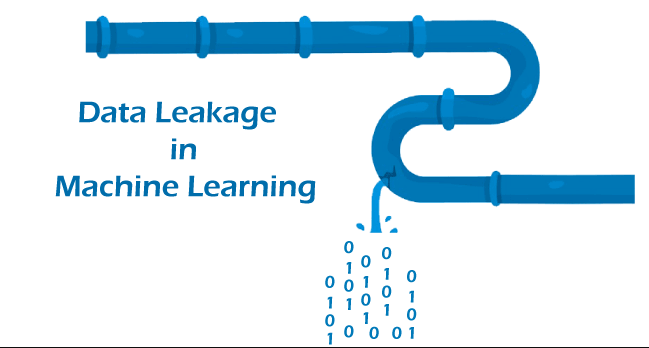

> 1. Antes de qualquer análise ou modelagem, deve-se separar em Treino, Validação e Teste. 

> 2. Isso é fundamental para o projeto, pois esta abordagem evita o Data Leakage (Vazamento de Dados)

> 3. Dessa forma, teremos três situações:

- Treino: Dados usados para Análise Exploratória e Modelagem
- Validação: Dados usados para Análise de Desempenho do Modelo
- Teste: Predição de Dados nunca vistos anteriormente, simulando um ambiente em produção

In [26]:
train = pd.read_csv('../06_modelo_previsao_satisfacao/data/santander_train.csv')
test = pd.read_csv('../06_modelo_previsao_satisfacao/data/santander_test.csv')

train.drop('ID', axis = 1, inplace = True)
test.drop('ID', axis = 1, inplace = True)

df_train = separa_treino_teste('TARGET', train, 0.25)[0]
df_valid = separa_treino_teste('TARGET', train, 0.25)[1]
df_test = test.copy()

print(f'Quantidade de registros Treino: {df_train.shape[0]}')
print(f'Quantidade de registros Validação: {df_valid.shape[0]}')
print(f'Quantidade de registros Teste: {df_test.shape[0]}')

Quantidade de registros Treino: 57015
Quantidade de registros Validação: 19005
Quantidade de registros Teste: 75818


# <font color='red' style='font-size: 40px;'> 2) Análise Exploratória - Análise Univariada e Bivariada</font>
<hr style='border: 2px solid red;'>

### 2.1) Análise dos Tipos de Variáveis

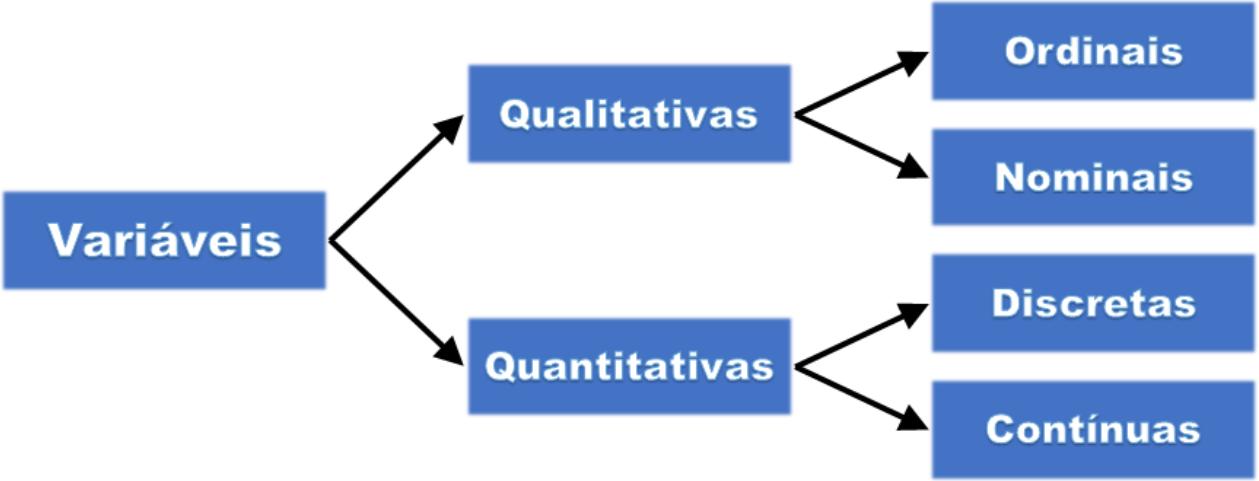

> 1. Para facilitar a Análise Exploratória, segmentou-se as variáveis em Qualitativas, Discretas e Contínuas.

> 2. As Qualitativas foram segmentadas em String e Numericas, pois caso existissem variáveis no formato "String" seria necessário realizar um Encoding nas etapas de Modelagem

> 3. Optou-se por não classificar nenhuma variável como Ordinal pois não se sabe o significado das variáveis

> 4. Essa abordagem é importante pois cada tipo de variável tem determinado jeito de ser analisada. 

In [27]:
analytics = df_train.copy()

qualitativas_string = [column for column in analytics.columns if analytics[column].dtype.name == 'object']
qualitativas_numericas = [column for column in analytics.columns if analytics[column].nunique() <= 5]
discretas = [column for column in analytics.columns if (analytics[column].nunique() > 5) and (analytics[column].nunique() <= 50)]
continuas = [column for column in analytics.columns if analytics[column].nunique() > 50]

print(f'Quantidade de Colunas Qualitativas String: {len(qualitativas_string)}')
print(f'Quantidade de Colunas Qualitativas Numericas: {len(qualitativas_numericas)}')
print(f'Quantidade de Colunas Discretas: {len(discretas)}')
print(f'Quantidade de Colunas Continuas: {len(continuas)}')

Quantidade de Colunas Qualitativas String: 0
Quantidade de Colunas Qualitativas Numericas: 211
Quantidade de Colunas Discretas: 77
Quantidade de Colunas Continuas: 82


### 2.2) Análise da Qualidade dos Dados

In [28]:
nulos = analytics.isnull().sum().sum()
print(f'Quantidade de Dados Nulos: {nulos}')

Quantidade de Dados Nulos: 0


> 1. Para os dados de treino, não foram encontrados valores ausentes.

### 2.3) Análise de Outliers

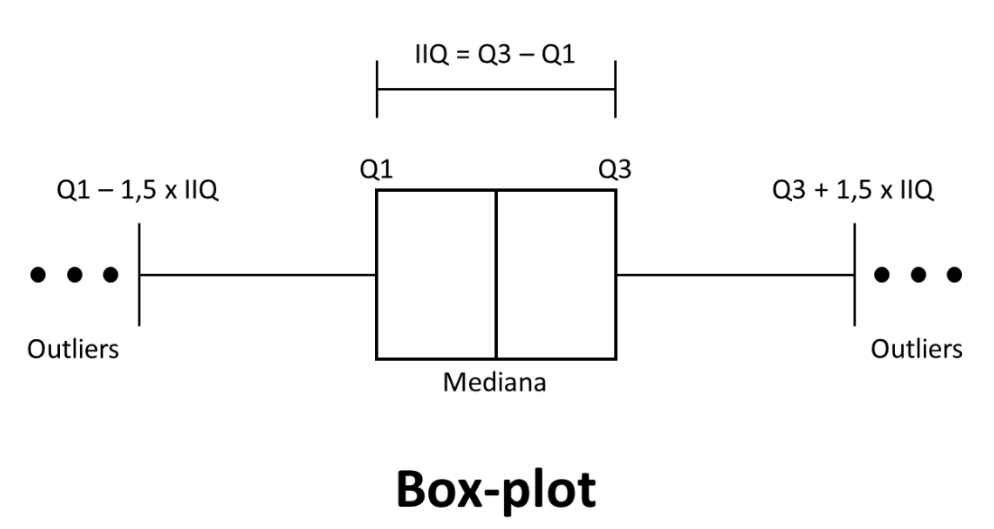

> 1. Inicialmente, realizou-se uma Análise de Outliers 

> 2. Para essa análise, calculou-se o Q1 e o Q3, bem como a Amplitude Interquartil para que fosse possível a obtenção dos Limites Inferiores e Superiores

> 3. Caso um registro seja menor que o Limite Inferior ou maior que o Limite Superior, ele é considerado um Outlier

In [29]:
lista_outliers = [col for col in analytics[discretas] if (analisa_outliers(analytics[col])[0] in analytics[col].unique()) | (analisa_outliers(analytics[col])[1] in analytics[col].unique())]
print(f'Quantidade de Features Discretas com Outliers: {len(lista_outliers)}')

lista_outliers = [col for col in analytics[continuas] if (analisa_outliers(analytics[col])[0] in analytics[col].unique()) | (analisa_outliers(analytics[col])[1] in analytics[col].unique())]
print(f'Quantidade de Features Contínuas com Outliers: {len(lista_outliers)}')

Quantidade de Features Discretas com Outliers: 72
Quantidade de Features Contínuas com Outliers: 75


### 2.4) Feature Selection Inicial

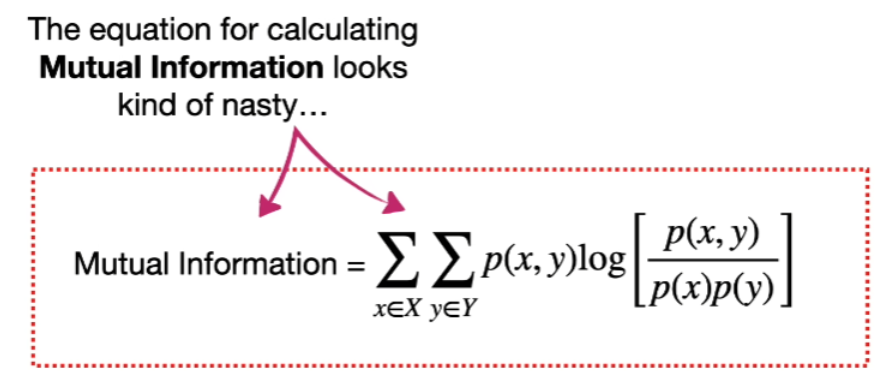

> 1. Inicialmente, retirou-se as Featurees de Baixa Variância, pois Features constantes não agregariam informações úteis para discriminar melhor a Target

> 2. Optou-se também por aplicar o Método de Mutual Information, o qual é uma medida estatística que mede a dependência entre duas variáveis da seguinte maneira:

- Inicialmente, ele cria uma tabela de contingência.

- Posteriormente calcula-se a probabilidade de dois eventos ocorrem ao mesmo tempo, bem como a probabilidade dos eventos ocorrerem individualmente.

- Através desse cálculo de probabilidades, pode-se quantificar o ganho de informação que a Target tem em relação a determinada Feature.

(57015, 120)


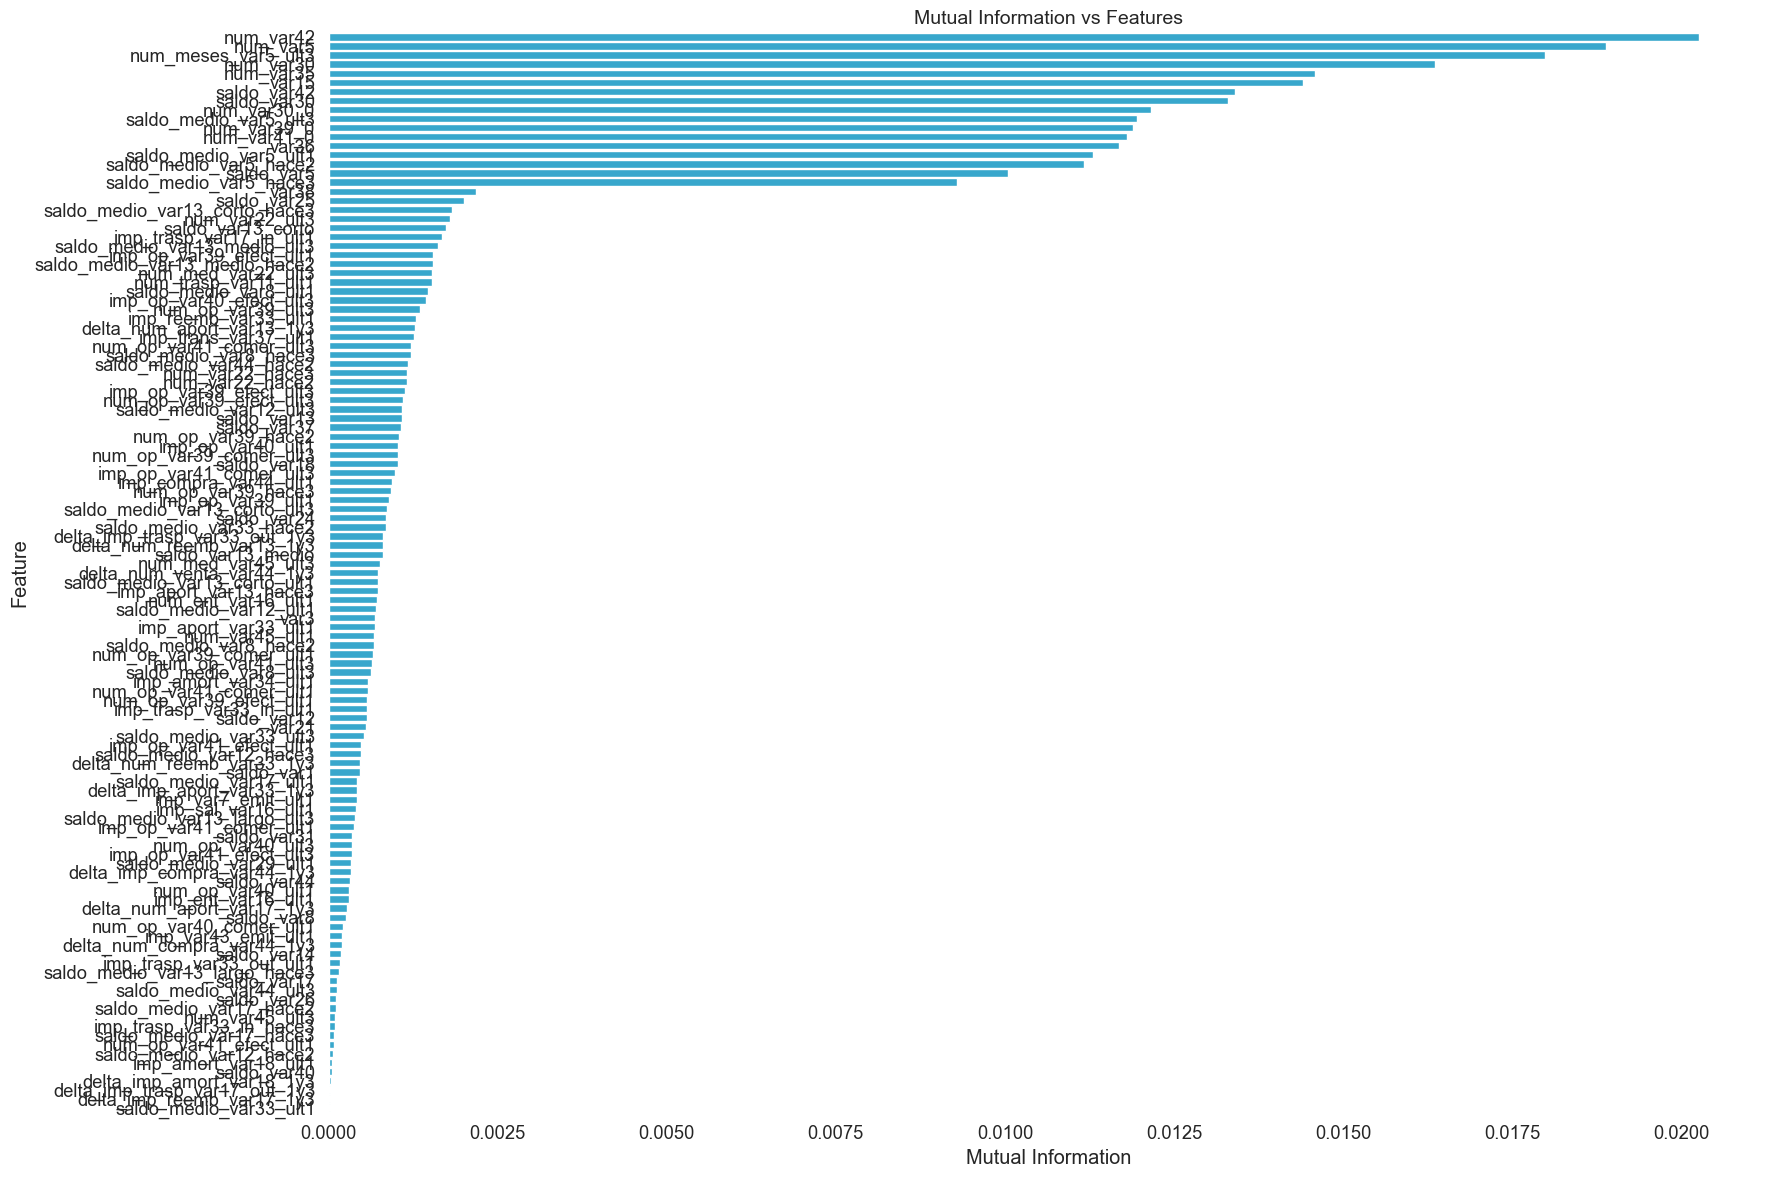

In [30]:
analytics_selected = analytics[remove_features_baixa_variancia('TARGET', analytics, 1)]
mutual_information = remove_features_mutual_information('TARGET', analytics_selected, 0)[0]
analytics_selected = analytics_selected[remove_features_mutual_information('TARGET', analytics_selected, 0)[1]]
print(analytics_selected.shape)
plt.figure(figsize= (18, 12))
sns.barplot(data=mutual_information, x="Mutual Information", y="Feature", color = '#1FB3E5')
plt.title(f'Mutual Information vs Features', fontsize = 14)
plt.grid(False)
plt.box(False)
plt.tight_layout()
plt.show()

qualitativas_numericas = [column for column in analytics_selected.columns if analytics_selected[column].nunique() <= 5]
discretas = [column for column in analytics_selected.columns if (analytics_selected[column].nunique() > 5) and (analytics_selected[column].nunique() <= 50)]
continuas = [column for column in analytics_selected.columns if analytics_selected[column].nunique() > 50]

### 2.5) Análise de Features Discretas Binárias

> 1. Nota-se que ao mesmo tempo há Features Balanceadas e Features Desbalanceadas

> 2. Esses casos desbalanceados são provenientes de ruídos, pois são valores completamente desproporcionais

> 3. Além disso, percebeu-se a presença de números ruídosos como o "9999999".

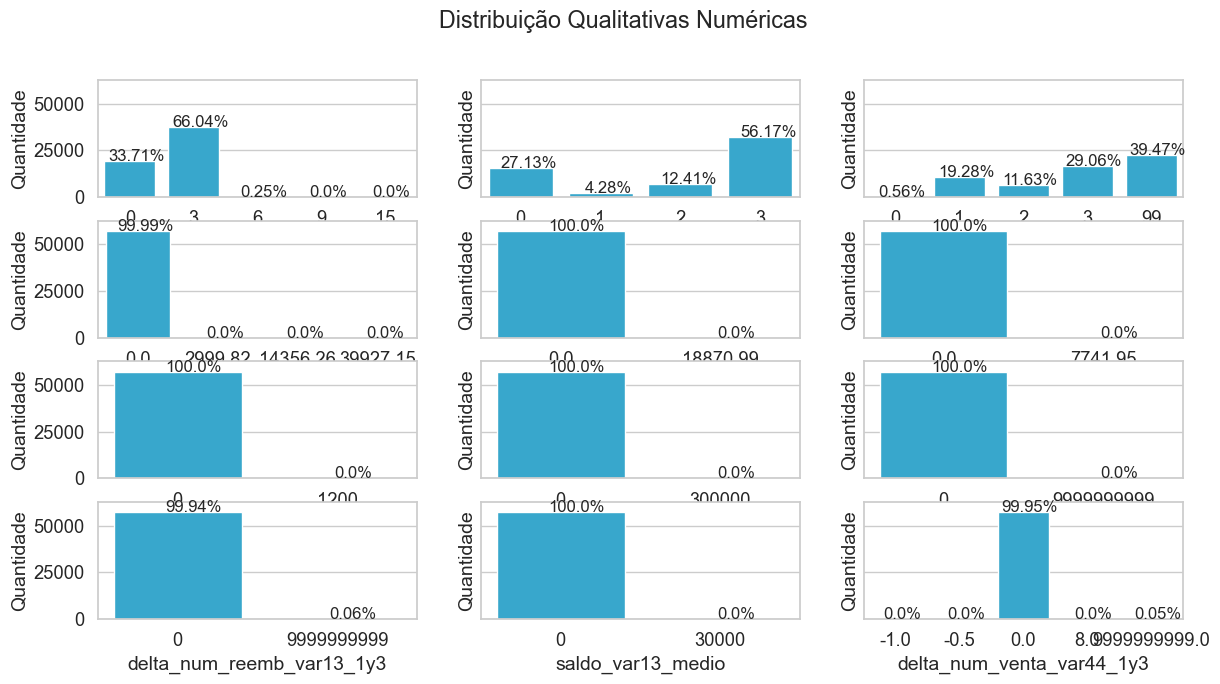

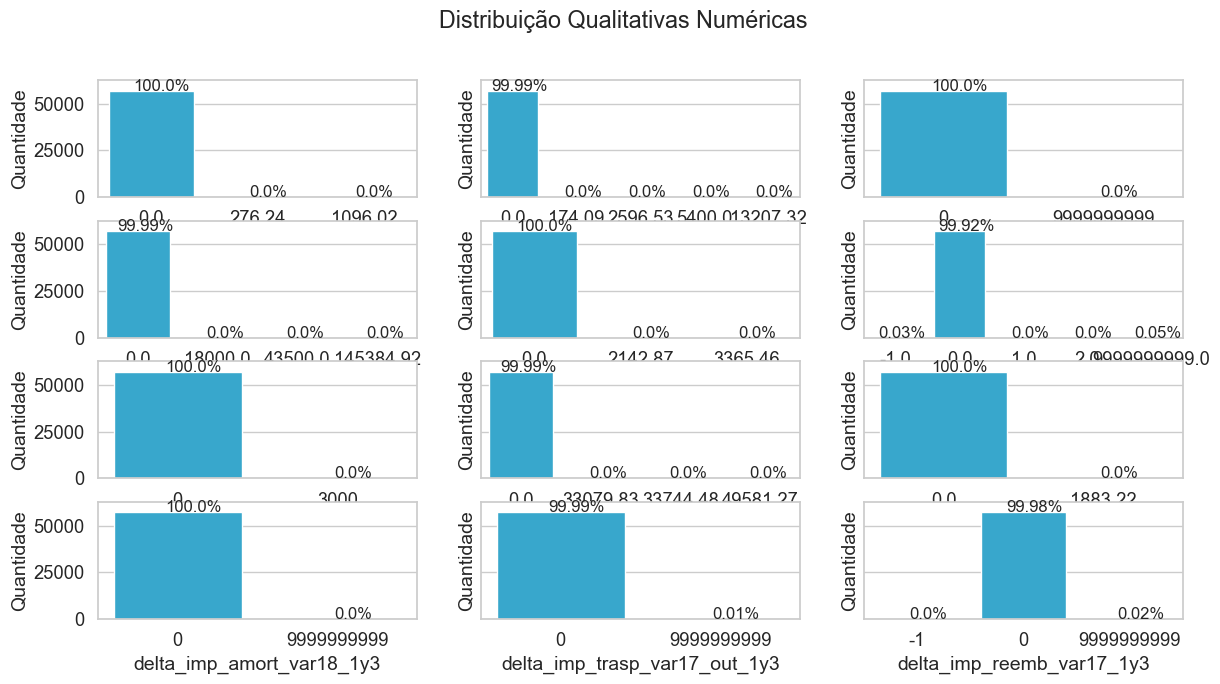

In [31]:
plota_barras(qualitativas_numericas[:13], False, analytics_selected, 4, 3, 'Distribuição Qualitativas Numéricas')
plota_barras(qualitativas_numericas[13:25], False, analytics_selected, 4, 3, 'Distribuição Qualitativas Numéricas')

### 2.6) Análise de Features Discretas

> 1. Há diversas features Discretas com Outliers ou Ruídos

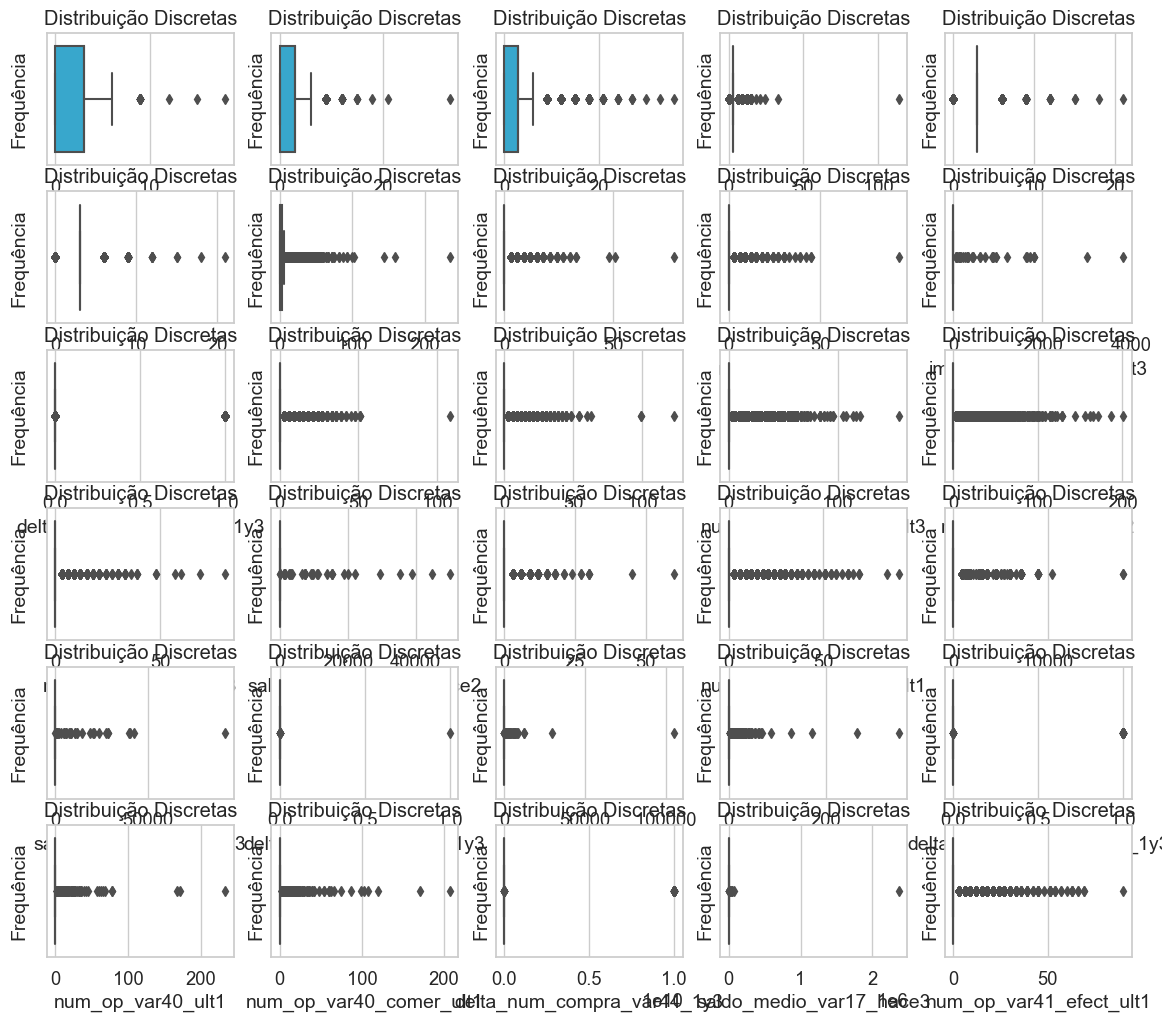

In [32]:
plota_boxplot(discretas, analytics_selected, 6, 5, 'Distribuição Discretas')

### 2.7) Análise de Features Contínuas 

> 1. Para as Features Contínuas, pelos Boxplots nota-se que a escala está sendo prejudicada por Outliers, Ruídos ou grande quantidade de dados zerados. 

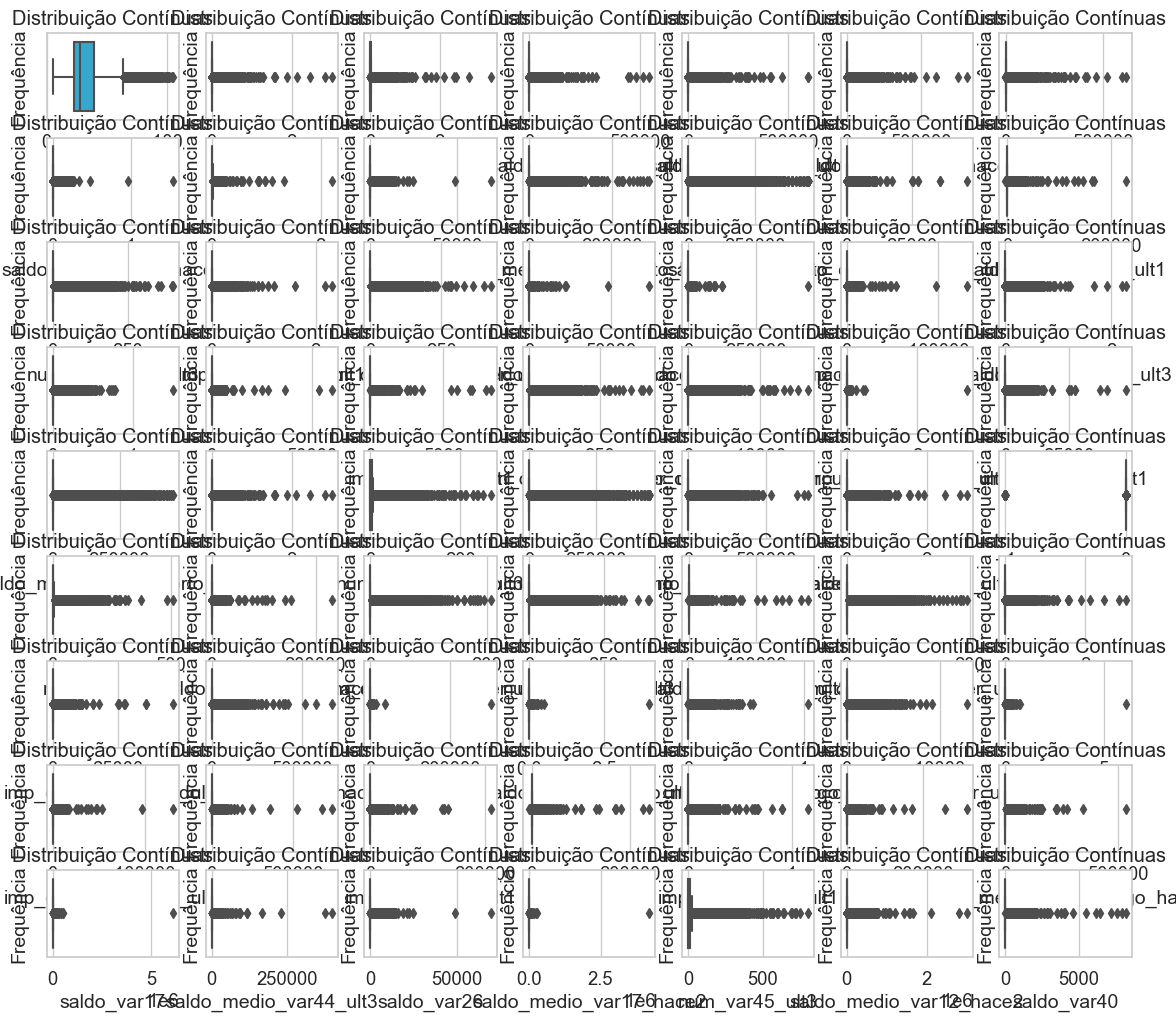

In [33]:
plota_boxplot(continuas, analytics_selected, 9, 7, 'Distribuição Contínuas')

> 2. Entre as variáveis contínuas, nota-se a presença de correlações fortes

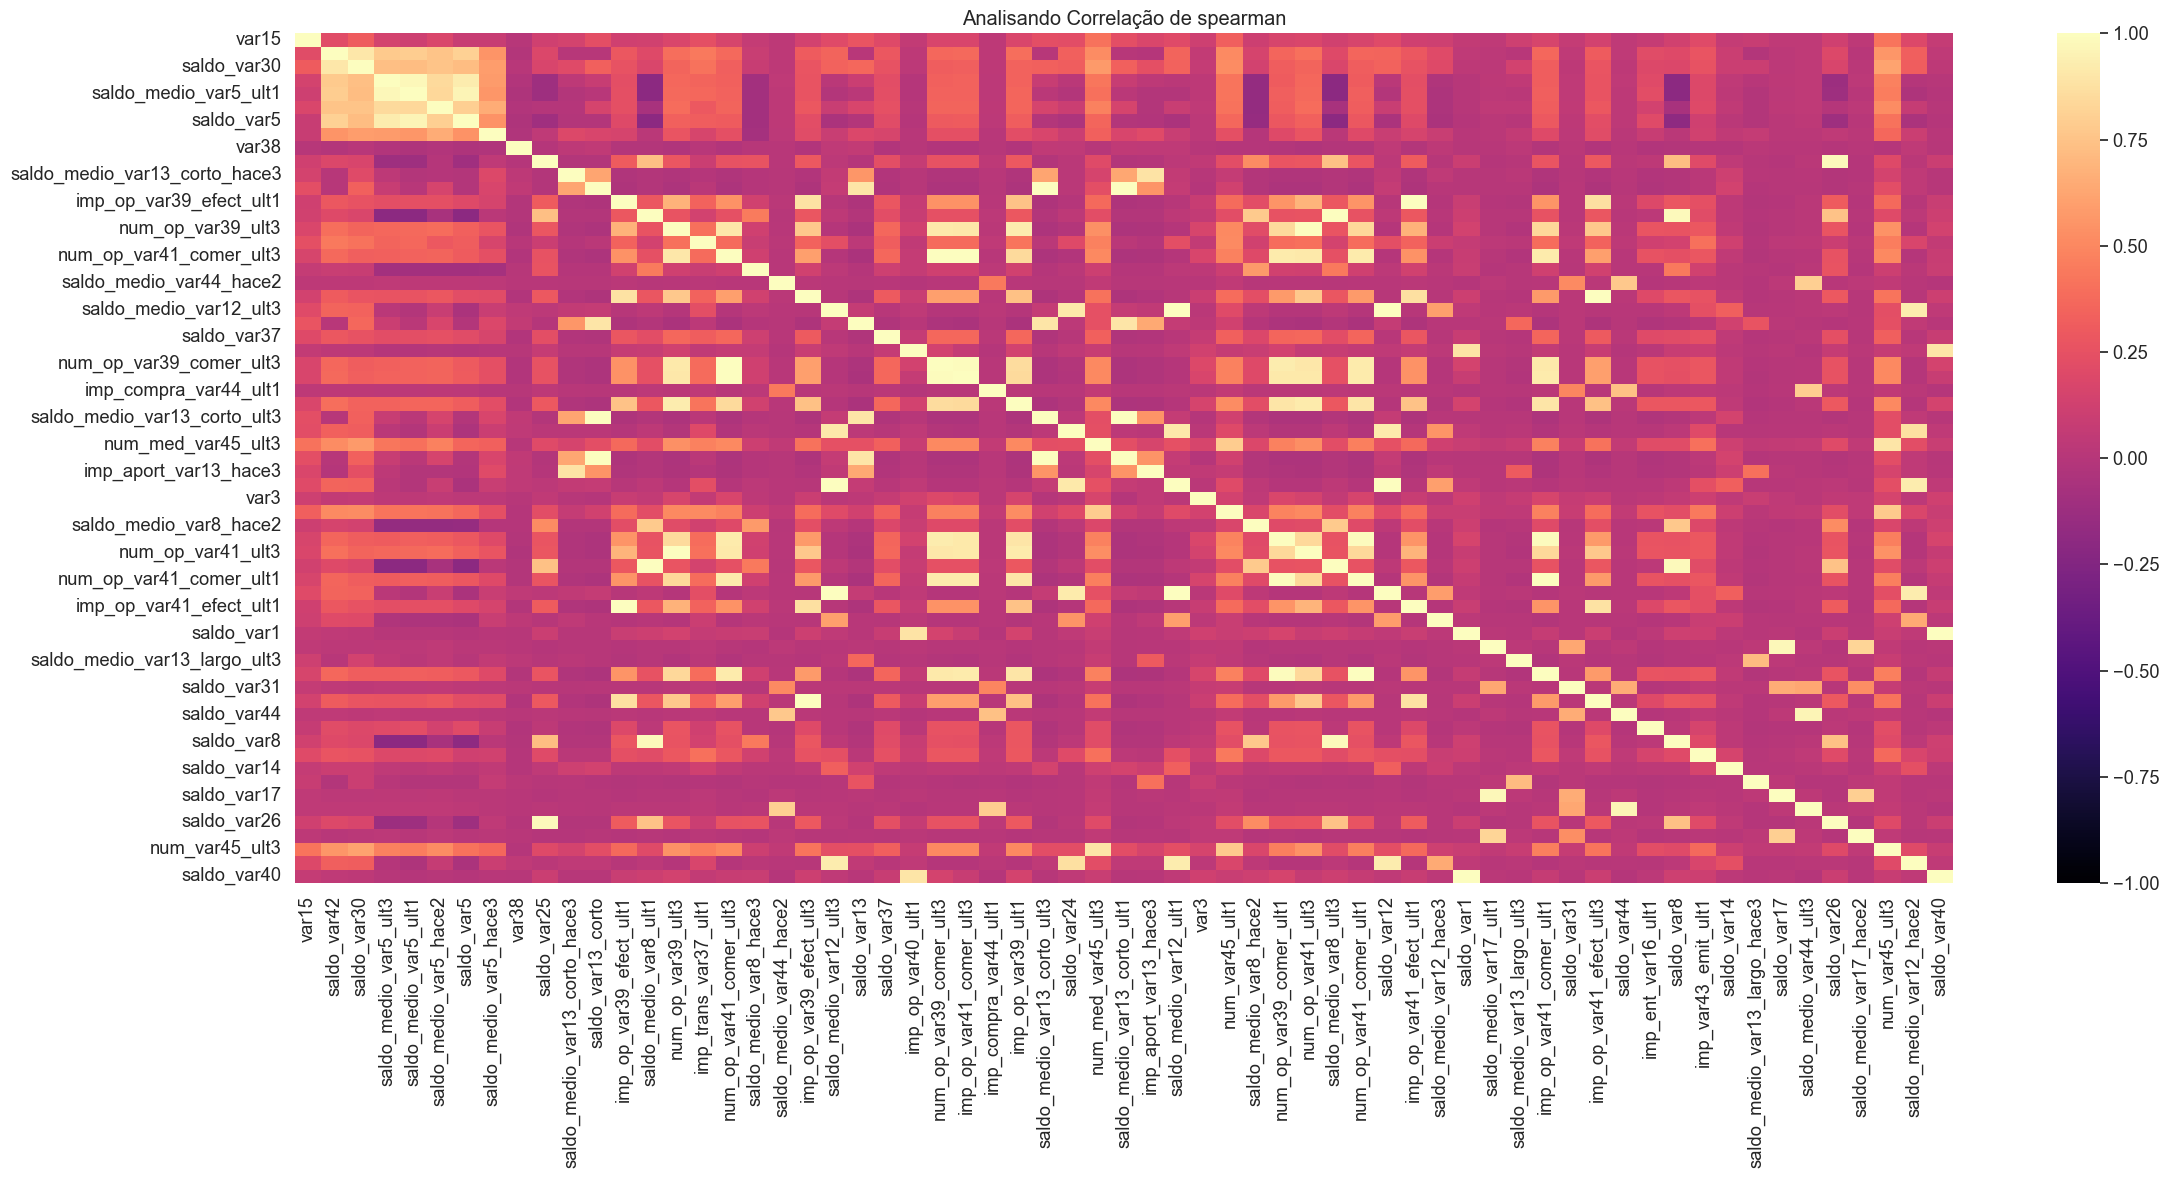

In [34]:
analisa_correlacao('spearman', analytics_selected[continuas])

### 2.8) Análise Univaridada da Target

> 1. A Target possui um comportamento bem desbalanceado, ou seja, em torno de 96% dos clientes apresentam satisfação, ao passo que 4% apresenta insatisfação.

> 2. Como é um problema de Classe Desbalanceada, necessita-se de alternativas viáveis para a parte de modelagem

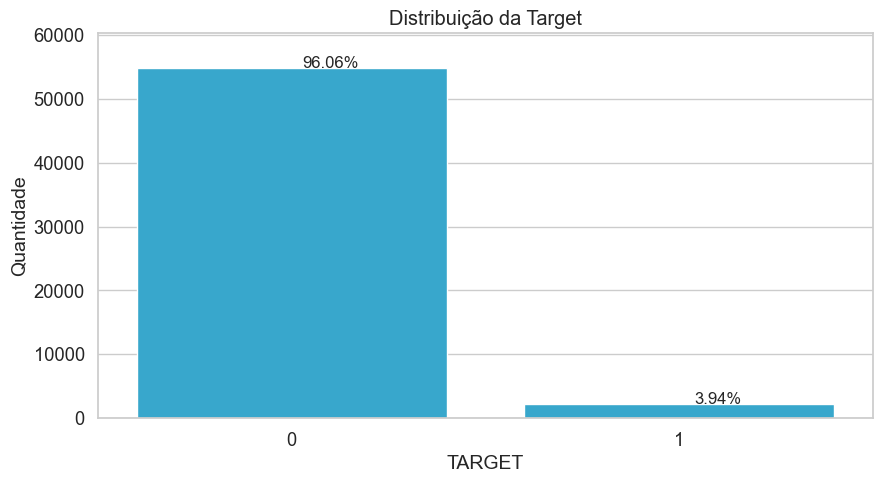

In [35]:
plota_barras(['TARGET'], False, analytics, 1, 1, 'Distribuição da Target')

# <font color='red' style='font-size: 40px;'> 3) Pré-Processamento e Feature Engineering </font>
<hr style='border: 2px solid red;'>

In [36]:
train = pd.read_csv('../06_modelo_previsao_satisfacao/data/santander_train.csv')
test = pd.read_csv('../06_modelo_previsao_satisfacao/data/santander_test.csv')

train.drop('ID', axis = 1, inplace = True)
test.drop('ID', axis = 1, inplace = True)

df_train = separa_treino_teste('TARGET', train, 0.25)[0]
df_valid = separa_treino_teste('TARGET', train, 0.25)[1]
df_test = test.copy()

print(f'Quantidade de registros Treino: {df_train.shape[0]}')
print(f'Quantidade de registros Validação: {df_valid.shape[0]}')
print(f'Quantidade de registros Teste: {df_test.shape[0]}')

Quantidade de registros Treino: 57015
Quantidade de registros Validação: 19005
Quantidade de registros Teste: 75818


### 3.1) Remoção de Features com Baixa Variância ou Ruído

> 1. Removendo Features de baixa Variância, pois elas não agregam informação útil para discriminar a Target 

In [37]:
df_train = df_train[remove_features_baixa_variancia('TARGET', df_train, 1)]
print(df_train.shape)

(57015, 184)


### 3.2) Seleção de Features com Maior Dependência com a Target

> 1. Junto disso, aplicou-se também um Método de Feature Selection chamado Select K Best, o qual seleciona as "K" melhores Features com base em algum teste estatístico

> 2. No caso em questão, como temos uma Target qualitativa e Features discretas e contínuas, optou-se pela escolha através do "mutual info". 

> 3. A informação mútua é uma medida estatística que quantifica a dependência entre duas variáveis aleatórias, logo, avalia a relevância ou a importância das variáveis de entrada em relação à variável de saída. Ela mede o quanto a informação de uma variável ajuda a prever a outra variável.

In [38]:
df_train = df_train[remove_features_mutual_information('TARGET', df_train, 0)[1]]
print(df_train.shape)

(57015, 120)


### 3.3) Retirando Features com Feature Importance Baixa

> 1. O Feature Importance calcula a importância de cada variável para reduzir a função de custo.

> 2. Escolheu-se levar para os testes de Modelagem apenas Features com Feature Importance > 0.01, ou seja, que possuem ao menos 1% de contribuição para o Modelo 

In [39]:
df_train = df_train[remove_features_feature_importance('TARGET', df_train, 10, 0.01)]
print(df_train.shape)

(57015, 19)


### 3.4) Separação entre Features e Target

In [40]:
df_valid = df_valid[df_train.columns]

x_train = separa_feature_target('TARGET', df_train)[0]
y_train = separa_feature_target('TARGET', df_train)[1]

x_valid = separa_feature_target('TARGET', df_valid)[0]
y_valid = separa_feature_target('TARGET', df_valid)[1]

print(x_train.shape)
print(y_train.shape)

print(x_valid.shape)
print(y_valid.shape)

(57015, 18)
(57015, 1)
(19005, 18)
(19005, 1)


# <font color='red' style='font-size: 40px;'> 4) Modelagem </font>
<hr style='border: 2px solid red;'>

### 4.1) Modelos Baseline 

> 1. Para a parte de modelagem, escolheu-se três modelos: Regressão Logística, Random Forest e XGBoost 

> 2. A Regressão Logística foi escolhida por ser um modelo estável e muito tradicional, com boa capacidade de interpretababilidade 

> 3. A Random Forest é um ensemble o qual utiliza Bagging, portanto, ela reduz expressivamente a variância e previne problemas como Overfitting. 

> 4. O XGBoost, ao lado do CatBoost, é provavelmente o modelo de Boosting com maior poder preditivo que existe atualmente, permitindo que as previsões sejam muito precisas. 

### 4.2) Métricas de Baseline

In [41]:
class_weight = 10

# Regressão Logística
y_predict_train_reg_logistic = Classificador('Regressão Logística', x_train, y_train, x_valid, y_valid, class_weight)[1]
y_predict_valid_reg_logistic = Classificador('Regressão Logística', x_train, y_train, x_valid, y_valid, class_weight)[2]

# Random Forest
y_predict_train_random_forest = Classificador('Random Forest', x_train, y_train, x_valid, y_valid, class_weight)[1]
y_predict_valid_random_forest = Classificador('Random Forest', x_train, y_train, x_valid, y_valid, class_weight)[2]

# XGBoost
y_predict_train_xgboost = Classificador('XGBoost', x_train, y_train, x_valid, y_valid, class_weight)[1]
y_predict_valid_xgboost = Classificador('XGBoost', x_train, y_train, x_valid, y_valid, class_weight)[2]

# Métricas Modelos

metricas_reg_logistic = metricas_classificacao('Regressão Logística', y_train, y_predict_train_reg_logistic, y_valid, y_predict_valid_reg_logistic)
metricas_reg_logistic_validacao_cruzada = validacao_cruzada_classificacao('Regressão Logística', x_train, y_train, class_weight, 5)

metricas_random_forest = metricas_classificacao('Random Forest', y_train, y_predict_train_random_forest, y_valid, y_predict_valid_random_forest)
metricas_random_forest_validacao_cruzada = validacao_cruzada_classificacao('Random Forest', x_train, y_train, class_weight, 5)

metricas_xgboost = metricas_classificacao('XGBoost', y_train, y_predict_train_xgboost, y_valid, y_predict_valid_xgboost)
metricas_xgboost_validacao_cruzada = validacao_cruzada_classificacao('XGBoost', x_train, y_train, class_weight, 5)

# Métricas Finais

print('Métricas Finais')
metricas_finais = metricas_classificacao_modelos_juntos(
    [
        metricas_reg_logistic, 
        metricas_reg_logistic_validacao_cruzada,
        metricas_random_forest,
        metricas_random_forest_validacao_cruzada,
        metricas_xgboost,
        metricas_xgboost_validacao_cruzada
    ]
)
display(metricas_finais)

Métricas Finais


,Acuracia,Precisao,Recall,AUC,Etapa
Classificador,,,,,
Regressão Logística,0.89,0.17,0.45,0.68,treino
Regressão Logística,0.89,0.16,0.41,0.66,teste
Regressão Logística,0.89,0.16,0.45,0.78,validacao_cruzada
Random Forest,0.90,0.19,0.47,0.70,treino
Random Forest,0.90,0.18,0.42,0.67,teste
Random Forest,0.90,0.19,0.46,0.81,validacao_cruzada
XGBoost,0.88,0.18,0.56,0.73,treino
XGBoost,0.87,0.17,0.52,0.71,teste
XGBoost,0.88,0.17,0.54,0.82,validacao_cruzada


> 1. Realizou-se a consolidação das Métricas de Treino, Teste e Validação Cruzada para cada um dos Modelos. 

> 2. A métrica mais importante para este caso seria o Precision, pois altos valores de Precision significam um menor número de Falsos Positivos, reduzindo os custos de ação 

> 3. Mesmo com a Precision sendo o principal indicador, o Recall também é importante e foi a maior métrica devido ao balanceamento de classes. Isso ocorre pois essa técnica proporciona ao modelo a capacidade de penalizar a classe minoritária, portanto, ele passa a acertar mais quem realmente era um cliente insatisfeito, diminuindo drasticamente os Falsos Negativos.

> 4. A próxima etapa é otimizar o Modelo com melhor performance da Baseline.

### 4.3) Otimização do Modelo Escolhido

> 1. Optou-se por utilizar um Algoritmo de Busca Bayesiana para achar a melhor combinação de hiperparâmetros

> 2. Esse algoritmo aplica probabilidades condicionais para decidir, no fim, a combinação de hiperparâmetros que possui a maior probabilidade de maximizar a métrica desejada

> 3. Após a otimização, notou-se uma melhora expressiva da Precision

- Regularização L1 (Lasso): No XGBoost, o termo "reg_alpha" é usado para controlar a regularização L1. Ele adiciona uma penalidade proporcional à soma dos valores absolutos dos pesos dos nós terminais nas árvores. Isso incentiva o modelo a reduzir os pesos dos nós menos importantes ou remover completamente os nós irrelevantes.

- Regularização L2 (Ridge): No XGBoost, o termo "reg_lambda" é usado para controlar a regularização L2. Ele adiciona uma penalidade proporcional à soma dos quadrados dos pesos dos nós terminais nas árvores. Isso incentiva o modelo a reduzir a magnitude dos pesos em geral, evitando que se tornem muito grandes.

> 4. Finalmente, percebe-se que as Distribuições de Probabilidade do Modelo de Treino e Validação estão próximas, portanto, isso significa que o Modelo está performando da forma correta.

Melhores Parâmetros: OrderedDict([('colsample_bytree', 0.7717015338451563), ('gamma', 0.9600046132186582), ('learning_rate', 0.029858668143868672), ('max_depth', 7), ('n_estimators', 15), ('reg_alpha', 0.5255672768385259), ('reg_lambda', 0.785388901339449), ('scale_pos_weight', 8), ('subsample', 0.6928647954923324)])
Métricas Finais


,Acuracia,Precisao,Recall,AUC,Etapa,Classificador
0,0.91,0.22,0.53,0.73,treino,XGBoost
1,0.90,0.19,0.43,0.68,teste,XGBoost


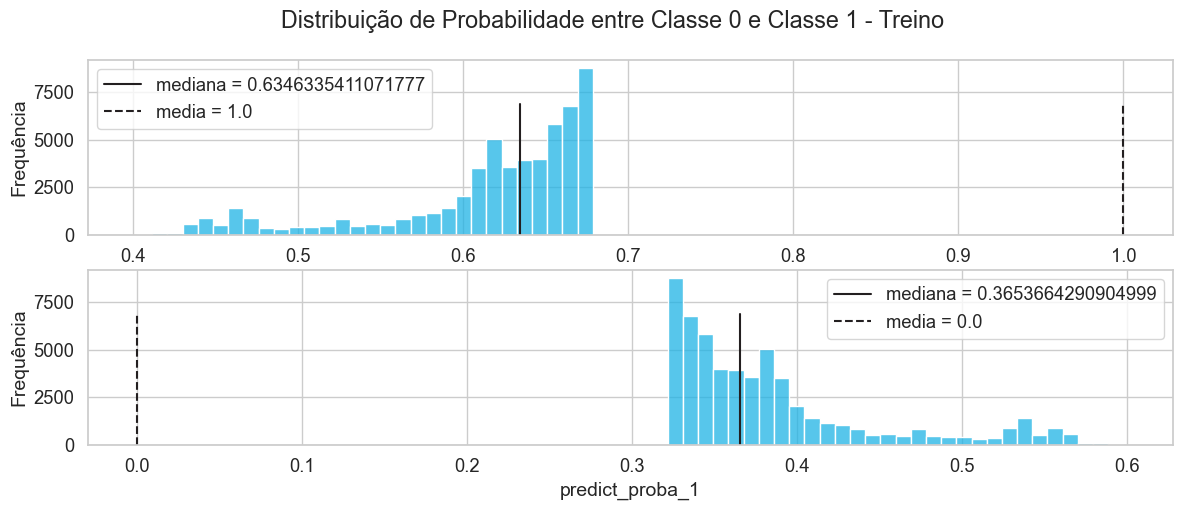

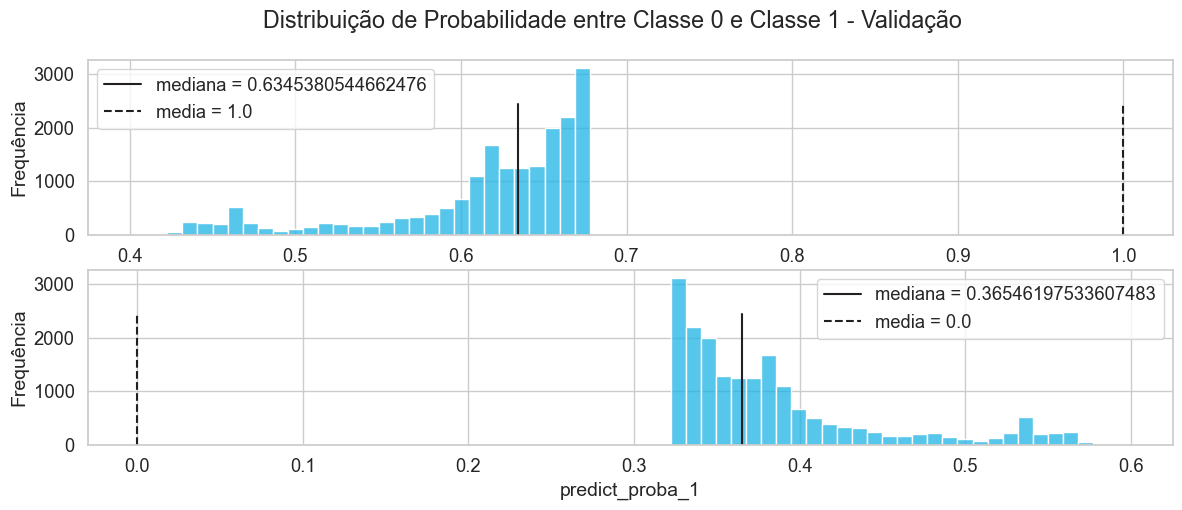

In [42]:
# Modelo Otimizado
modelo_final = modelo_otimizado('XGBoost', x_train, y_train, x_valid, y_valid)[0]
melhores_parametros = modelo_otimizado('XGBoost', x_train, y_train, x_valid, y_valid)[5]

y_predict_train_otimizado = modelo_otimizado('XGBoost', x_train, y_train, x_valid, y_valid)[1]
y_predict_valid_otimizado = modelo_otimizado('XGBoost', x_train, y_train, x_valid, y_valid)[2]
y_proba_train_otimizado = modelo_otimizado('XGBoost', x_train, y_train, x_valid, y_valid)[3]
y_proba_valid_otimizado = modelo_otimizado('XGBoost', x_train, y_train, x_valid, y_valid)[4]
metricas_otimizadas = metricas_classificacao('XGBoost', y_train, y_predict_train_otimizado, y_valid, y_predict_valid_otimizado)

# Métricas Otimizadas
print(f'Melhores Parâmetros: {melhores_parametros}')
print('Métricas Finais')
display(metricas_otimizadas)
print()
predict_proba_train = pd.DataFrame(y_proba_train_otimizado.tolist(), columns=['predict_proba_0', 'predict_proba_1'])
predict_proba_test = pd.DataFrame(y_proba_valid_otimizado.tolist(), columns=['predict_proba_0', 'predict_proba_1'])

plota_histograma(['predict_proba_0', 'predict_proba_1'], predict_proba_train, 2, 1, 'Distribuição de Probabilidade entre Classe 0 e Classe 1 - Treino')
plota_histograma(['predict_proba_0', 'predict_proba_1'], predict_proba_test, 2, 1, 'Distribuição de Probabilidade entre Classe 0 e Classe 1 - Validação')


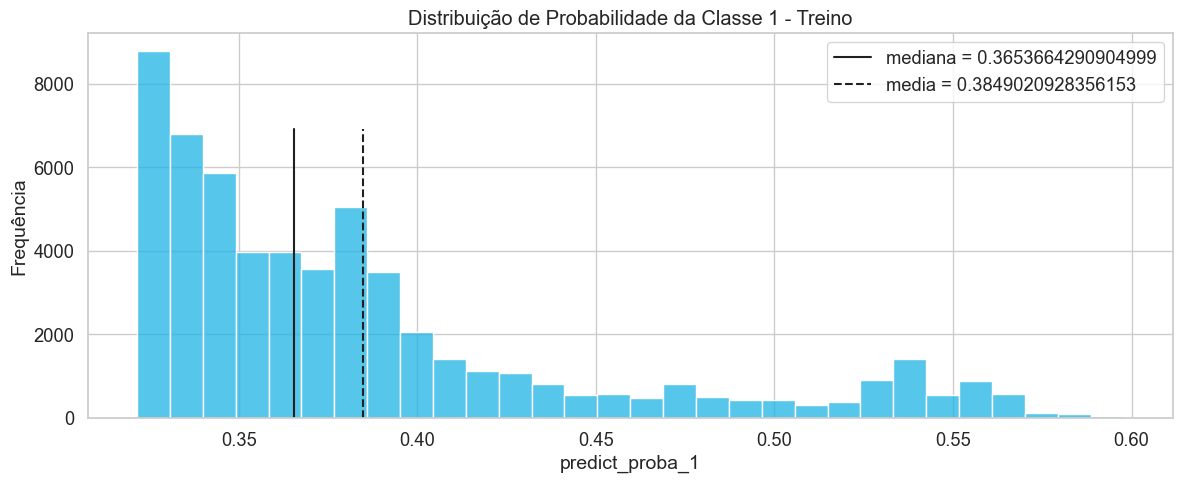

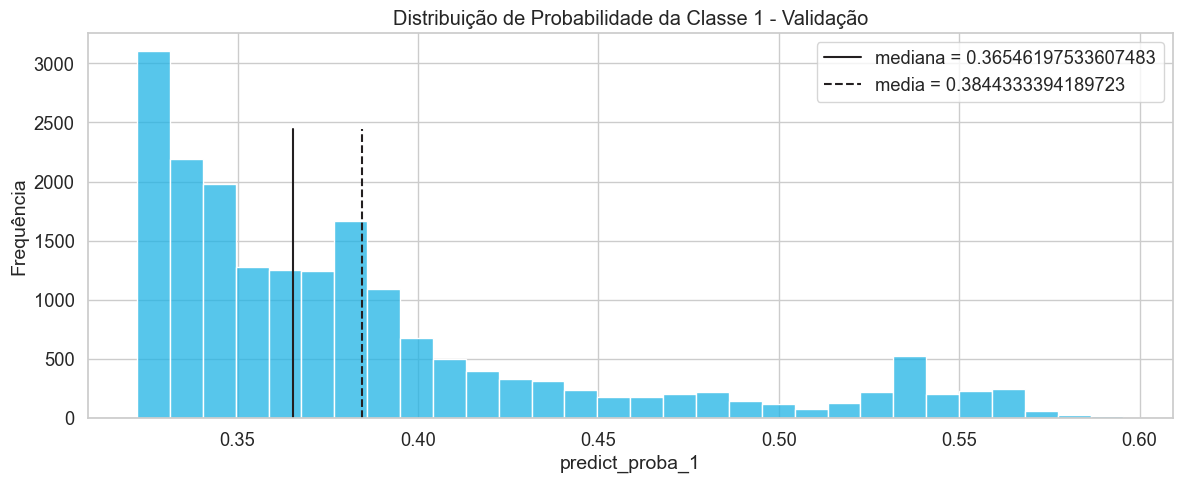

In [43]:
predict_proba_train = pd.DataFrame(y_proba_train_otimizado.tolist(), columns=['predict_proba_0', 'predict_proba_1'])
predict_proba_valid = pd.DataFrame(y_proba_valid_otimizado.tolist(), columns=['predict_proba_0', 'predict_proba_1'])

plota_histograma(['predict_proba_1'], predict_proba_train, 1, 1, 'Distribuição de Probabilidade da Classe 1 - Treino')
plota_histograma(['predict_proba_1'], predict_proba_valid, 1, 1, 'Distribuição de Probabilidade da Classe 1 - Validação')

# <font color='red' style='font-size: 40px;'> 5) Quantificação de Resultados </font>
<hr style='border: 2px solid red;'>

### 5.1) Calibração do Threshold de Probabilidade para Otimização do Retorno Financeiro

> 1. Pelo corte de Probabilidade, nota-se que o melhor corte é 0.54, pois ele é o que retorna o melhor lucro possível


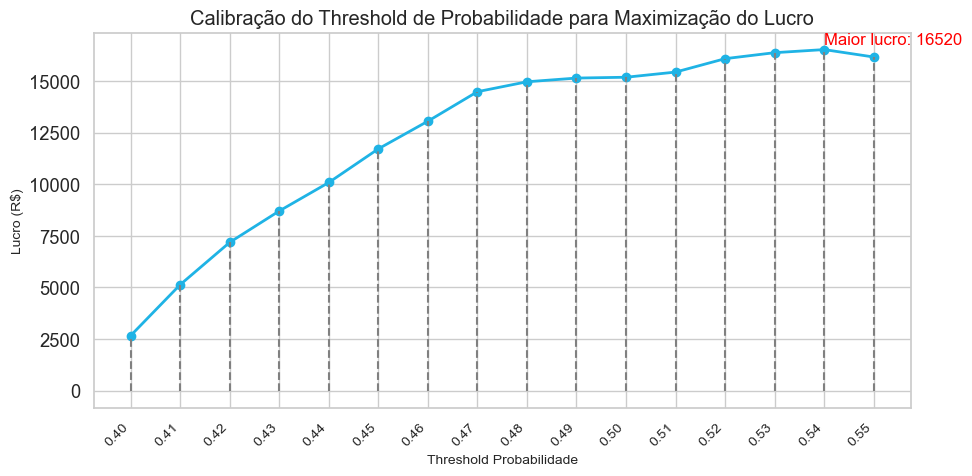

In [44]:
cortes_probabilidade = modelo_corte_probabilidade('XGBoost', x_train, y_train, x_valid, y_valid, 'TARGET')
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(10, 5))  # Define o tamanho do gráfico
plt.plot(cortes_probabilidade['threshold'], cortes_probabilidade['lucro'], marker='o', color='#1FB3E5', linewidth=2)
for x, y in zip(cortes_probabilidade['threshold'], cortes_probabilidade['lucro']):
    plt.vlines(x, 0, y, colors='gray', linestyles='dashed', alpha=1)
plt.title("Calibração do Threshold de Probabilidade para Maximização do Lucro")
plt.xlabel('Threshold Probabilidade', fontsize = 10)
plt.ylabel('Lucro (R$)', fontsize = 10)
plt.xticks(cortes_probabilidade['threshold'], rotation=45, ha='right', fontsize = 10)
# Encontra o índice do maior valor de lucro
indice_maior_lucro = cortes_probabilidade['lucro'].idxmax()

# Anotação com o valor do maior lucro
plt.text(cortes_probabilidade['threshold'][indice_maior_lucro], cortes_probabilidade['lucro'][indice_maior_lucro] + 500,
         f'Maior lucro: {cortes_probabilidade["lucro"].max()}', fontsize=12, color='red',
         ha='left', va='center')
plt.locator_params(axis='y', nbins=8)
plt.tight_layout()
plt.show()


### 5.2) Aplicação em Dados de Teste

> 1. Novamente, a Distribuição de Probabilidade está próxima entre Treino e Teste, o que é um ótimo sinal, pois indica que o Modelo performa analogamente tanto em dados de Treino quanto Teste

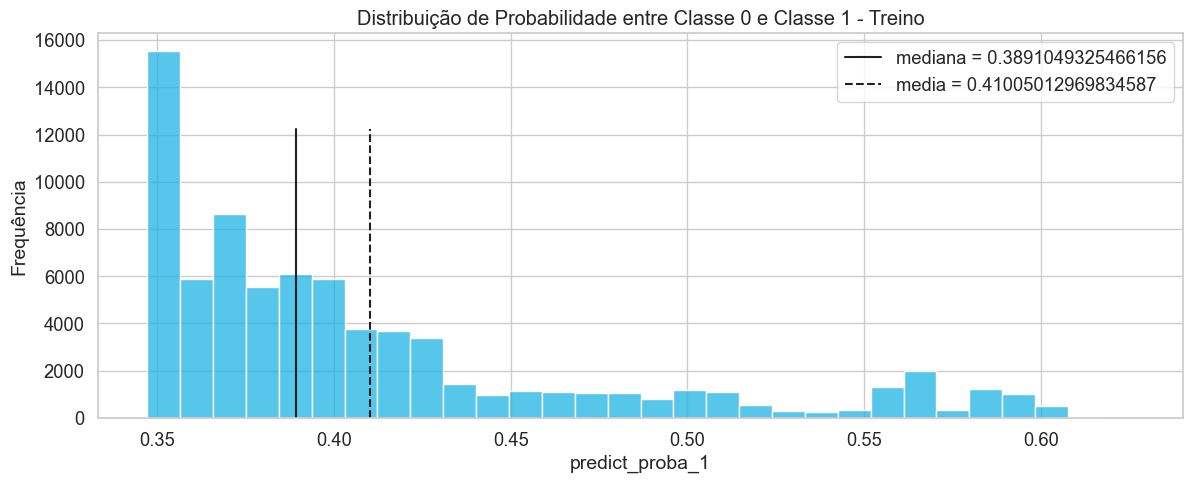

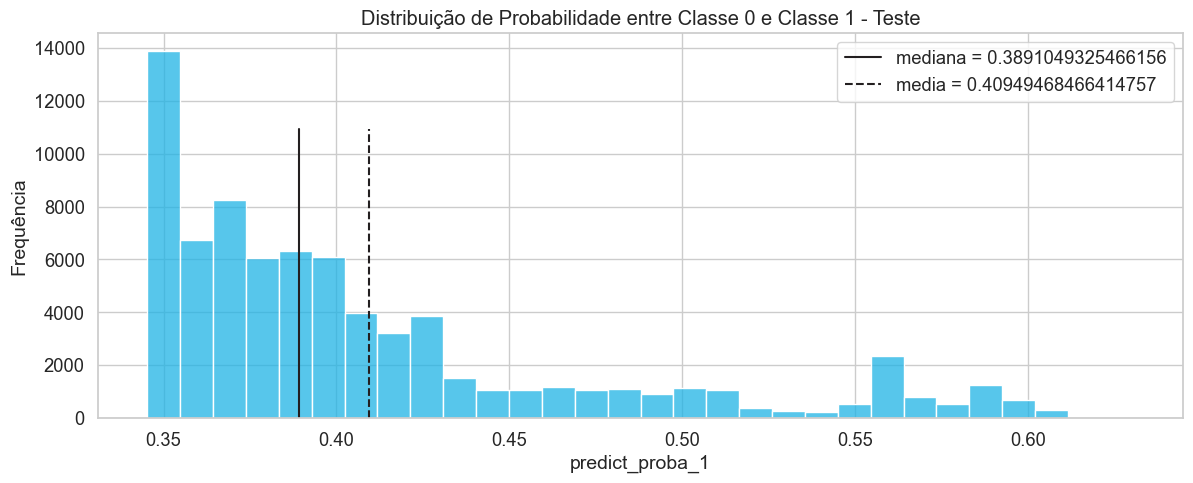

In [45]:
train = pd.read_csv('../06_modelo_previsao_satisfacao/data/santander_train.csv')
test = pd.read_csv('../06_modelo_previsao_satisfacao/data/santander_test.csv')

train.drop('ID', axis = 1, inplace = True)
test.drop('ID', axis = 1, inplace = True)

train = train[remove_features_baixa_variancia('TARGET', train, 0.01)]
train = train[remove_features_mutual_information('TARGET', train, 0)[1]]
train = train[remove_features_feature_importance('TARGET', train, 10, 0.01)]


x_train = separa_feature_target('TARGET', train)[0]
y_train = separa_feature_target('TARGET', train)[1]

pipeline = modelo_oficial('XGBoost', x_train, y_train)[0]
modelo = pipeline.named_steps['xgbclassifier']
train_y_predict = modelo_oficial('XGBoost', x_train, y_train)[1]
train_predict_proba = modelo_oficial('XGBoost', x_train, y_train)[2]

test = test[x_train.columns]

qualitativas_numericas = [column for column in test.columns if test[column].nunique() <= 5]
discretas = [column for column in test.columns if (test[column].nunique() > 5) and (test[column].nunique() <= 50)]
continuas = [column for column in test.columns if test[column].nunique() > 50]

preprocessor = ColumnTransformer([
            ('qualitativas_numericas', make_pipeline(SimpleImputer(strategy='constant')), qualitativas_numericas),
            ('discretas', make_pipeline(SimpleImputer(strategy='median')), discretas),
            ('continuas', make_pipeline(SimpleImputer(strategy='median')), continuas)
])

preprocessor.fit(test)
x_transformed = preprocessor.transform(test)

test_y_predict = modelo.predict(x_transformed)
test_predict_proba = modelo.predict_proba(x_transformed)

predict_proba_train = pd.DataFrame(train_predict_proba.tolist(), columns=['predict_proba_0', 'predict_proba_1'])
predict_proba_test = pd.DataFrame(test_predict_proba.tolist(), columns=['predict_proba_0', 'predict_proba_1'])

plota_histograma(['predict_proba_1'], predict_proba_train, 1, 1, 'Distribuição de Probabilidade entre Classe 0 e Classe 1 - Treino')
plota_histograma(['predict_proba_1'], predict_proba_test, 1, 1, 'Distribuição de Probabilidade entre Classe 0 e Classe 1 - Teste')